# Import some libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [66]:
data = pd.read_csv('train_LCP.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [68]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [69]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [70]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [71]:
for col in data.columns:
    print("-"*50)
    print(col)
    print(data[col].value_counts())

--------------------------------------------------
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
--------------------------------------------------
Gender
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
Married
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------------------
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
44

In [72]:
data.shape[0]

614

In [73]:
# lets check null value percentage
data.isnull().sum()*100/data.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# imputing null values

In [74]:
cat_cols_imp = ['Gender', 'Married', 'Dependents','Self_Employed', 'Credit_History']

for col in cat_cols_imp:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)

In [75]:
num_cols_imp = ['LoanAmount', 'Loan_Amount_Term']

for col in num_cols_imp:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)

In [76]:
# data.dropna(inplace = True)

# data.reset_index(drop = True, inplace = True)
# lets check null value percentage
data.isnull().sum()*100/data.shape[0]

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [77]:
data.reset_index(drop = True, inplace = True)

In [78]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [79]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


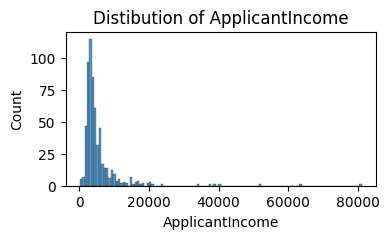

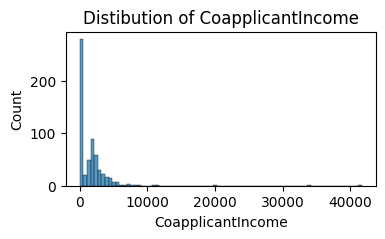

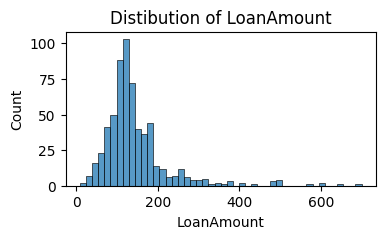

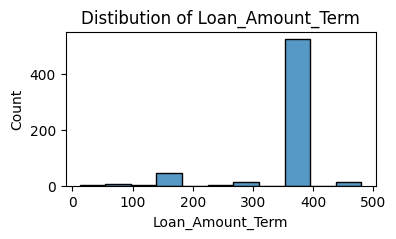

In [80]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'] 

for col in num_cols:

    # lets see the distribution of data
    plt.figure(figsize = (4,2))
    sns.histplot(data[col])
    plt.title(f"Distibution of {col}")
    plt.show()

In [81]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

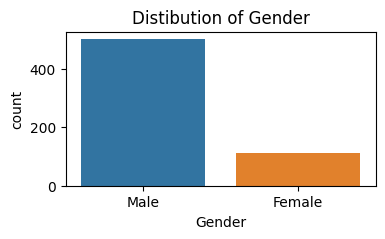

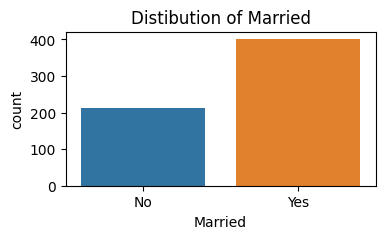

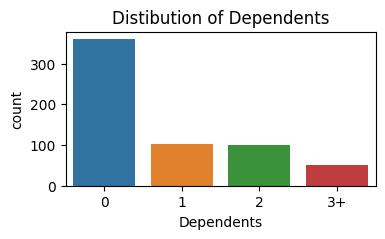

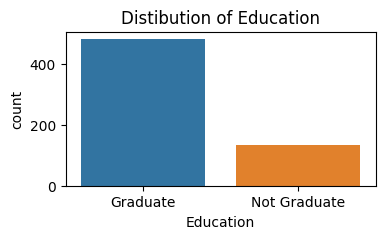

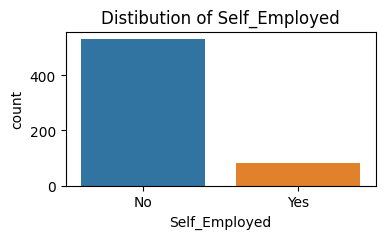

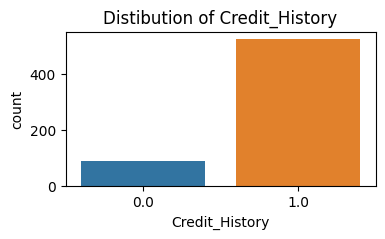

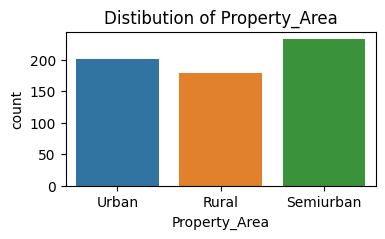

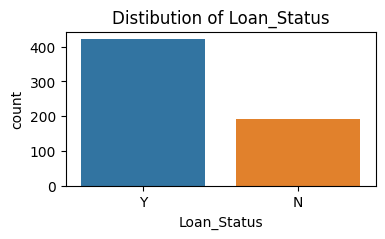

In [82]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'] 

for col in cat_cols:

    # lets see the distribution of data
    plt.figure(figsize = (4,2))
    sns.countplot(data = data, x=col)
    plt.title(f"Distibution of {col}")
    plt.show()

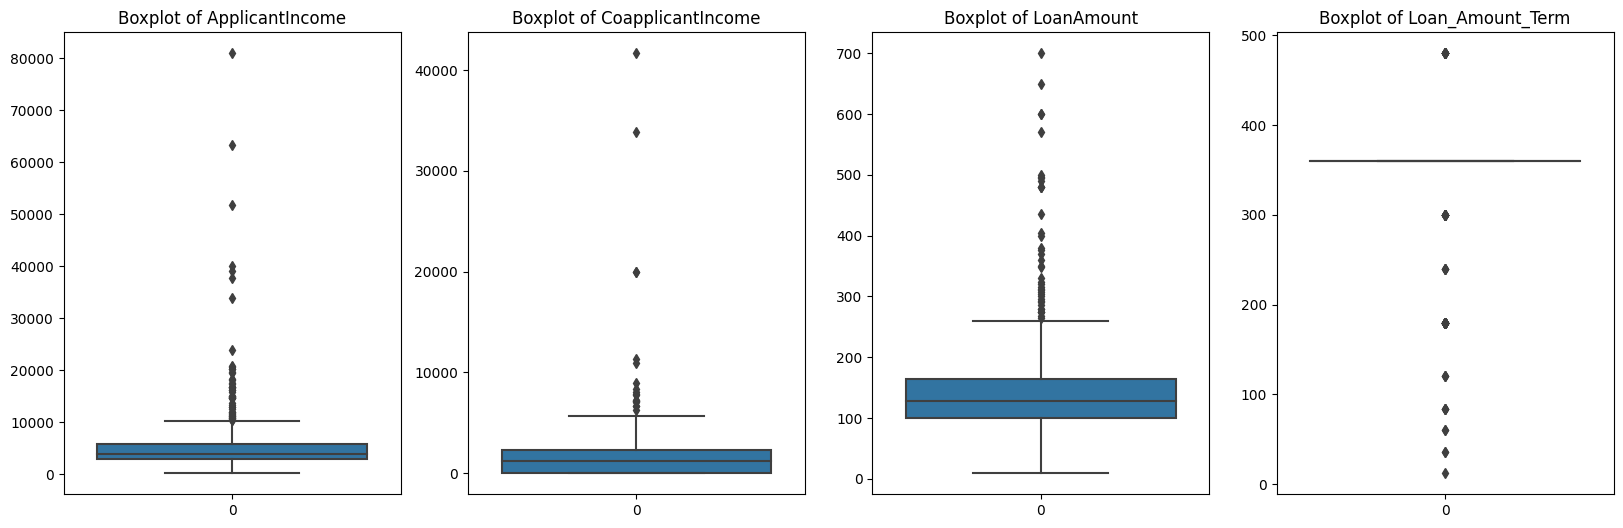

In [83]:
n_rows = 1
n_cols = len(num_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize= ( 20, 6*n_rows))
for i, col in enumerate(num_cols):
    sns.boxplot(data[col], ax = axis[i])
    axis[i].set_title(f'Boxplot of {col}')
    
plt.show()

In [84]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [85]:
# checking no. of oultliers
outliers_count = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_count[col] = outliers.shape[0]

outliers_count
    
    

{'ApplicantIncome': 50,
 'CoapplicantIncome': 18,
 'LoanAmount': 41,
 'Loan_Amount_Term': 88}

In [86]:
# Replacing the outliers
outliers_count = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # cap the outliers
    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else x)
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else x)
    

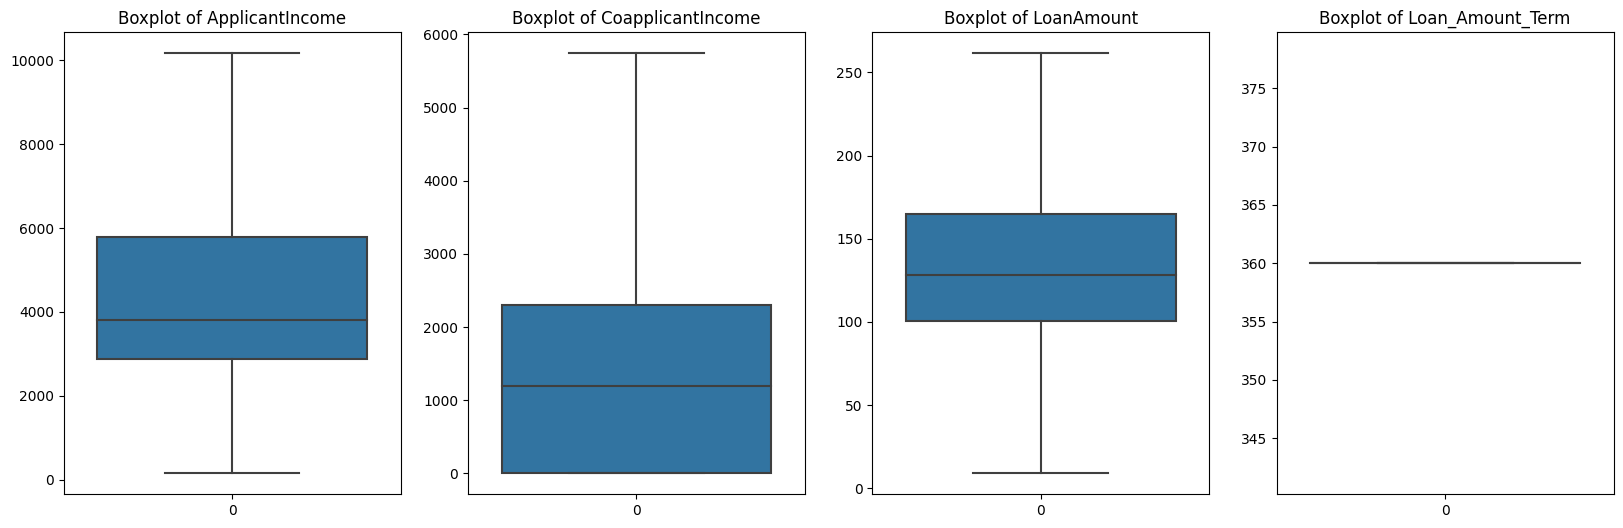

In [87]:
n_rows = 1
n_cols = len(num_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize= ( 20, 6*n_rows))
for i, col in enumerate(num_cols):
    sns.boxplot(data[col], ax = axis[i])
    axis[i].set_title(f'Boxplot of {col}')
    
plt.show()

In [88]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
# scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome'	,'LoanAmount',	'Loan_Amount_Term']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome'	,'LoanAmount',	'Loan_Amount_Term']])

In [90]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.497164,-0.874587,-0.168041,0.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.013767,0.054395,-0.168041,0.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.652632,-0.874587,-1.280462,0.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.820924,0.578025,-0.311579,0.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.558104,-0.874587,0.065209,0.0,1.0,Urban,Y


In [91]:
data['Gender'].astype("category").cat.codes

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Length: 614, dtype: int8

In [92]:
# label encoding 
label_col = ['Gender', 'Married', 'Education','Self_Employed','Loan_Status']

for col in label_col:
    data[col] = data[col].astype("category").cat.codes


In [93]:
# one hot encoding
data = pd.get_dummies(data, columns = ['Dependents','Property_Area'], drop_first = True)
data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.497164,-0.874587,-0.168041,0.0,1.0,1,0,0,0,0,1
1,LP001003,1,1,0,0,-0.013767,0.054395,-0.168041,0.0,1.0,0,1,0,0,0,0
2,LP001005,1,1,0,1,-0.652632,-0.874587,-1.280462,0.0,1.0,1,0,0,0,0,1
3,LP001006,1,1,1,0,-0.820924,0.578025,-0.311579,0.0,1.0,1,0,0,0,0,1
4,LP001008,1,0,0,0,0.558104,-0.874587,0.065209,0.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,-0.692990,-0.874587,-1.190750,0.0,1.0,1,0,0,0,0,0
610,LP002979,1,1,0,0,-0.206274,-0.874587,-1.746961,0.0,1.0,1,0,0,1,0,0
611,LP002983,1,1,0,0,1.394319,-0.726739,2.074743,0.0,1.0,1,1,0,0,0,1
612,LP002984,1,1,0,0,1.196969,-0.874587,0.890553,0.0,1.0,1,0,1,0,0,1


In [94]:
data.drop(["Loan_ID"], axis = 1, inplace = True)
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.497164,-0.874587,-0.168041,0.0,1.0,1,0,0,0,0,1
1,1,1,0,0,-0.013767,0.054395,-0.168041,0.0,1.0,0,1,0,0,0,0
2,1,1,0,1,-0.652632,-0.874587,-1.280462,0.0,1.0,1,0,0,0,0,1
3,1,1,1,0,-0.820924,0.578025,-0.311579,0.0,1.0,1,0,0,0,0,1
4,1,0,0,0,0.558104,-0.874587,0.065209,0.0,1.0,1,0,0,0,0,1


In [30]:
from sklearn.model_selection  import train_test_split
X = data.drop('Loan_Status',axis = 1)
y = data['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 54)

In [34]:
# Balancing the data        # ! pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

print('Before SMOTE :- ')
print(y_train.value_counts())
sm = SMOTE(random_state = 54)
X_res,y_res = sm.fit_resample(X,y)
print('After SMOTE :-')
print(y_res.value_counts())


Before SMOTE :- 
1    293
0    136
Name: Loan_Status, dtype: int64
After SMOTE :-
1    422
0    422
Name: Loan_Status, dtype: int64


In [32]:
y_res.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [33]:
y_train.value_counts()

1    293
0    136
Name: Loan_Status, dtype: int64

# Model training

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [98]:
parameters = {'C' :[0.001,0.01,0.1,1,10],
              'penalty': ['l1','l2']}
grid = GridSearchCV(LogisticRegression(solver = "liblinear"),param_grid = parameters,cv = 5)
grid.fit(X_res, y_res)
print("best parameters :-",grid.best_params_)

best parameters :- {'C': 10, 'penalty': 'l2'}


In [99]:
LR = LogisticRegression(C = 10, penalty= 'l2')
LR.fit(X_res,y_res)

LogisticRegression(C=10)

In [101]:
y_pred = LR.predict(X_test)
print("Classification Report :- \n",classification_report(y_test, y_pred))
print("Confusion Matrix :- \n",confusion_matrix(y_test, y_pred))

Classification Report :- 
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        56
           1       0.81      0.81      0.81       129

    accuracy                           0.73       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.73      0.73      0.73       185

Confusion Matrix :- 
 [[ 31  25]
 [ 25 104]]


## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':[50,100,150],
              'criterion' : ['gini', 'entropy'],
                'max_depth' :[20,50,30]}

grid = GridSearchCV(RandomForestClassifier(), param_grid= parameters, cv = 5)
grid.fit(X_res,y_res)
print("best parameters :-",grid.best_params_)

best parameters :- {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 150}


In [104]:
RF = RandomForestClassifier(n_estimators= 150, criterion= "gini", max_depth= 20)
RF.fit(X_res,y_res)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [105]:
y_pred = RF.predict(X_test)
print("Classification Report :- \n",classification_report(y_test, y_pred))
print("Confusion Matrix :- \n",confusion_matrix(y_test, y_pred))

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00       129

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

Confusion Matrix :- 
 [[ 56   0]
 [  0 129]]


# Exporting the model

In [106]:
import pickle

In [108]:
with open('randomforest_model.pkl','wb') as model_file:
    pickle.dump(RF, model_file)

In [109]:
with open('randomforest_model.pkl','rb') as model_file:
    loaded_model = pickle.load(model_file)

In [110]:
y_sample_pred = loaded_model.predict(X_test)